In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [2]:
df=pd.read_csv('Dataset.csv')

In [3]:
df.head()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,100000,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,...,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,0.002653,s
1,100001,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,...,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226,2.233584,b
2,100002,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,...,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251,2.347389,b
3,100003,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000,5.446378,b
4,100004,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,6.245333,b


In [4]:
df.shape

(250000, 33)

In [5]:
#from autoviz.AutoViz_Class import AutoViz_Class

#AV = AutoViz_Class()

In [6]:
df.Label.value_counts()

b    164333
s     85667
Name: Label, dtype: int64

In [7]:
df.drop('EventId',axis=1,inplace=True)

In [8]:
df.isnull().sum()

DER_mass_MMC                   0
DER_mass_transverse_met_lep    0
DER_mass_vis                   0
DER_pt_h                       0
DER_deltaeta_jet_jet           0
DER_mass_jet_jet               0
DER_prodeta_jet_jet            0
DER_deltar_tau_lep             0
DER_pt_tot                     0
DER_sum_pt                     0
DER_pt_ratio_lep_tau           0
DER_met_phi_centrality         0
DER_lep_eta_centrality         0
PRI_tau_pt                     0
PRI_tau_eta                    0
PRI_tau_phi                    0
PRI_lep_pt                     0
PRI_lep_eta                    0
PRI_lep_phi                    0
PRI_met                        0
PRI_met_phi                    0
PRI_met_sumet                  0
PRI_jet_num                    0
PRI_jet_leading_pt             0
PRI_jet_leading_eta            0
PRI_jet_leading_phi            0
PRI_jet_subleading_pt          0
PRI_jet_subleading_eta         0
PRI_jet_subleading_phi         0
PRI_jet_all_pt                 0
Weight    

In [9]:
## Replacing all -999 values to null values

In [10]:
df.replace({-999:np.nan},inplace=True)

In [11]:
df.shape

(250000, 32)

In [12]:
df.isnull().sum()

DER_mass_MMC                    38114
DER_mass_transverse_met_lep         0
DER_mass_vis                        0
DER_pt_h                            0
DER_deltaeta_jet_jet           177457
DER_mass_jet_jet               177457
DER_prodeta_jet_jet            177457
DER_deltar_tau_lep                  0
DER_pt_tot                          0
DER_sum_pt                          0
DER_pt_ratio_lep_tau                0
DER_met_phi_centrality              0
DER_lep_eta_centrality         177457
PRI_tau_pt                          0
PRI_tau_eta                         0
PRI_tau_phi                         0
PRI_lep_pt                          0
PRI_lep_eta                         0
PRI_lep_phi                         0
PRI_met                             0
PRI_met_phi                         0
PRI_met_sumet                       0
PRI_jet_num                         0
PRI_jet_leading_pt              99913
PRI_jet_leading_eta             99913
PRI_jet_leading_phi             99913
PRI_jet_subl

In [13]:
## Replacing all null values to 0

In [14]:
df.fillna(0,inplace=True)

In [15]:
df.isnull().sum()

DER_mass_MMC                   0
DER_mass_transverse_met_lep    0
DER_mass_vis                   0
DER_pt_h                       0
DER_deltaeta_jet_jet           0
DER_mass_jet_jet               0
DER_prodeta_jet_jet            0
DER_deltar_tau_lep             0
DER_pt_tot                     0
DER_sum_pt                     0
DER_pt_ratio_lep_tau           0
DER_met_phi_centrality         0
DER_lep_eta_centrality         0
PRI_tau_pt                     0
PRI_tau_eta                    0
PRI_tau_phi                    0
PRI_lep_pt                     0
PRI_lep_eta                    0
PRI_lep_phi                    0
PRI_met                        0
PRI_met_phi                    0
PRI_met_sumet                  0
PRI_jet_num                    0
PRI_jet_leading_pt             0
PRI_jet_leading_eta            0
PRI_jet_leading_phi            0
PRI_jet_subleading_pt          0
PRI_jet_subleading_eta         0
PRI_jet_subleading_phi         0
PRI_jet_all_pt                 0
Weight    

In [16]:
le=LabelEncoder()

In [17]:
df['Label']=le.fit_transform(df['Label'])

In [18]:
df.head()

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,...,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,197.760,...,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,0.002653,1
1,160.937,68.768,103.235,48.146,0.00,0.000,0.000,3.473,2.078,125.157,...,1,46.226,0.725,1.158,0.000,0.00,0.000,46.226,2.233584,0
2,0.000,162.172,125.953,35.635,0.00,0.000,0.000,3.148,9.336,197.814,...,1,44.251,2.053,-2.028,0.000,0.00,0.000,44.251,2.347389,0
3,143.905,81.417,80.943,0.414,0.00,0.000,0.000,3.310,0.414,75.968,...,0,0.000,0.000,0.000,0.000,0.00,0.000,-0.000,5.446378,0
4,175.864,16.915,134.805,16.405,0.00,0.000,0.000,3.891,16.405,57.983,...,0,0.000,0.000,0.000,0.000,0.00,0.000,0.000,6.245333,0


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 32 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   DER_mass_MMC                 250000 non-null  float64
 1   DER_mass_transverse_met_lep  250000 non-null  float64
 2   DER_mass_vis                 250000 non-null  float64
 3   DER_pt_h                     250000 non-null  float64
 4   DER_deltaeta_jet_jet         250000 non-null  float64
 5   DER_mass_jet_jet             250000 non-null  float64
 6   DER_prodeta_jet_jet          250000 non-null  float64
 7   DER_deltar_tau_lep           250000 non-null  float64
 8   DER_pt_tot                   250000 non-null  float64
 9   DER_sum_pt                   250000 non-null  float64
 10  DER_pt_ratio_lep_tau         250000 non-null  float64
 11  DER_met_phi_centrality       250000 non-null  float64
 12  DER_lep_eta_centrality       250000 non-null  float64
 13 

In [20]:
df['PRI_jet_num'].value_counts()

0    99913
1    77544
2    50379
3    22164
Name: PRI_jet_num, dtype: int64

In [21]:
target=df.pop('Label')

In [22]:
mm=MinMaxScaler()

In [23]:
x_train,x_test,y_train,y_test=train_test_split(df,target,test_size=0.25,random_state=0)

In [ ]:
#Distribution of classes in train and test

In [58]:
unique, counts = np.unique(y_train, return_counts=True)
print("For training")
np.asarray((unique, counts)).T

For training


array([[     0, 123217],
       [     1,  64283]], dtype=int64)

In [60]:
unique, counts = np.unique(y_test, return_counts=True)
print("For testing")
np.asarray((unique, counts)).T

For testing


array([[    0, 41116],
       [    1, 21384]], dtype=int64)

In [24]:
cols=[cols for cols in df.columns if df[cols].dtypes=='float64']

In [25]:
x_train[cols]=mm.fit_transform(x_train[cols])

<ipython-input-25-237fe123b20e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train[cols]=mm.fit_transform(x_train[cols])
C:\Users\mayur\anaconda3\envs\tensorflow_new\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


In [26]:
x_test[cols]=mm.transform(x_test[cols])

<ipython-input-26-e58244295106>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test[cols]=mm.transform(x_test[cols])
C:\Users\mayur\anaconda3\envs\tensorflow_new\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


In [27]:
x_train

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,...,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight
202866,0.138231,0.115485,0.057674,0.021817,0.000000,0.000000,0.516680,0.438641,0.007042,0.050147,...,0.097426,1,0.041727,0.233659,0.533821,0.000000,0.500111,0.500080,0.029099,0.002191
221867,0.000000,0.086531,0.046501,0.000918,0.000000,0.000000,0.516680,0.367421,0.000918,0.015092,...,0.038922,0,0.000000,0.499889,0.500080,0.000000,0.500111,0.500080,0.000000,0.248085
159299,0.052701,0.093983,0.032754,0.020368,0.000000,0.000000,0.516680,0.181337,0.004738,0.049241,...,0.093004,1,0.039832,0.590151,0.172370,0.000000,0.500111,0.500080,0.027778,0.246471
77206,0.112176,0.016252,0.041704,0.034835,0.043622,0.018094,0.531333,0.418188,0.008451,0.106028,...,0.163095,3,0.096038,0.561138,0.470476,0.048426,0.602245,0.685978,0.109684,0.000000
86909,0.000000,0.104206,0.009032,0.000992,0.000000,0.000000,0.516680,0.103725,0.000992,0.001650,...,0.045516,0,0.000000,0.499889,0.500080,0.000000,0.500111,0.500080,0.000000,0.253120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176963,0.000000,0.253546,0.062489,0.003694,0.000000,0.000000,0.516680,0.268627,0.003694,0.031506,...,0.095935,0,0.000000,0.499889,0.500080,0.000000,0.500111,0.500080,0.000000,0.339998
117952,0.000000,0.107332,0.035583,0.001928,0.000000,0.000000,0.516680,0.383309,0.001928,0.009551,...,0.014652,0,0.000000,0.499889,0.500080,0.000000,0.500111,0.500080,0.000000,0.612681
173685,0.103078,0.036340,0.052281,0.007073,0.000000,0.000000,0.516680,0.518992,0.007073,0.016496,...,0.053556,0,0.000000,0.499889,0.500080,0.000000,0.500111,0.500080,0.000000,0.214819
43567,0.080768,0.003061,0.040523,0.034946,0.480435,0.093537,0.398066,0.298576,0.011265,0.144676,...,0.186710,3,0.052047,0.745998,0.338851,0.073561,0.294510,0.087219,0.141651,0.010473


In [28]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,BatchNormalization,LeakyReLU
from tensorflow.keras.initializers import he_uniform,he_normal
#from tensorflow.keras.preprocessing.image import img_to_arra,load_img,ImageDataGenerator,array_to_img
from tensorflow.keras.activations import relu


In [29]:
## Building ann model

In [30]:
from sklearn.metrics import accuracy_score

In [31]:
import keras_tuner as kt

In [32]:
def my_model(hp):
  model = tf.keras.Sequential()
  
  # Tune the number of units in the first Dense layer
  # Choose an optimal value between 32-512
  hp_units1 = hp.Int('units1', min_value=32, max_value=512, step=32)
  hp_units2 = hp.Int('units2', min_value=32, max_value=512, step=32)
  hp_units3 = hp.Int('units3', min_value=32, max_value=512, step=32)
  model.add(Dense(units=hp_units1, activation='relu',input_dim=31))
  model.add(tf.keras.layers.Dense(units=hp_units2, activation='relu'))
  model.add(tf.keras.layers.Dense(units=hp_units3, activation='relu'))
  model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))

  # Tune the learning rate for the optimizer
  # Choose an optimal value from 0.01, 0.001, or 0.0001
  hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

  model.compile(
      optimizer=tf.keras.optimizers.Adam(learning_rate=hp_learning_rate),
      loss='binary_crossentropy',
      metrics=['accuracy'])

  return model


In [37]:
tuner = kt.Hyperband(
    my_model,
    objective='val_accuracy',
    max_epochs=10,
    directory='keras_tuner_dir2',
    project_name='keras_tuner_demo'
)

tuner.search(x_train,y_train, epochs=10, validation_split=0.2)

Trial 30 Complete [00h 01m 36s]
val_accuracy: 1.0

Best val_accuracy So Far: 1.0
Total elapsed time: 00h 13m 28s
INFO:tensorflow:Oracle triggered exit


In [ ]:
## Best parameters for number of neurons in each layer

In [39]:
for h_param in [f"units{i}" for i in range(1,4)] + ['learning_rate']:
  print(h_param, tuner.get_best_hyperparameters()[0].get(h_param))

units1 160
units2 320
units3 224
learning_rate 0.01


In [40]:
best_model=tuner.get_best_models()[0]
best_model.build(x_train.shape)
best_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 160)               5120      
_________________________________________________________________
dense_1 (Dense)              (None, 320)               51520     
_________________________________________________________________
dense_2 (Dense)              (None, 224)               71904     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 225       
Total params: 128,769
Trainable params: 128,769
Non-trainable params: 0
_________________________________________________________________


In [41]:
history=best_model.fit(
    x_train, 
    y_train,
    validation_split=0.3,
    epochs=10,
    batch_size=64
)

Epoch 1/10
2051/2051 [==============================] - 3s 2ms/step - loss: 0.0129 - accuracy: 0.9981 - val_loss: 0.1209 - val_accuracy: 0.9438
Epoch 2/10
2051/2051 [==============================] - 3s 1ms/step - loss: 0.0058 - accuracy: 0.9980 - val_loss: 1.9139e-05 - val_accuracy: 1.0000
Epoch 3/10
2051/2051 [==============================] - 3s 1ms/step - loss: 6.7067e-06 - accuracy: 1.0000 - val_loss: 2.6385e-06 - val_accuracy: 1.0000
Epoch 4/10
2051/2051 [==============================] - 3s 1ms/step - loss: 0.0048 - accuracy: 0.9989 - val_loss: 7.7364e-05 - val_accuracy: 1.0000
Epoch 5/10
2051/2051 [==============================] - 3s 1ms/step - loss: 0.0010 - accuracy: 0.9996 - val_loss: 5.3934e-06 - val_accuracy: 1.0000
Epoch 6/10
2051/2051 [==============================] - 3s 1ms/step - loss: 4.7140e-06 - accuracy: 1.0000 - val_loss: 2.9655e-06 - val_accuracy: 1.0000
Epoch 7/10
2051/2051 [==============================] - 3s 1ms/step - loss: 1.4466e-06 - accuracy: 1.0000 - 

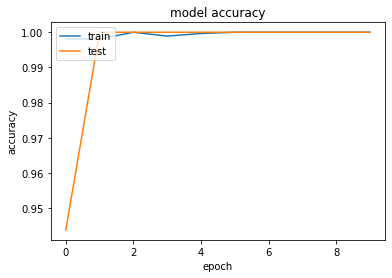

In [42]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [44]:
preds=best_model.predict(x_test)

In [45]:
predictions=np.where(preds < 0.5,0,1)

In [46]:
predictions

array([[1],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [47]:
from sklearn.metrics import classification_report

In [48]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     41116
           1       1.00      1.00      1.00     21384

    accuracy                           1.00     62500
   macro avg       1.00      1.00      1.00     62500
weighted avg       1.00      1.00      1.00     62500



In [55]:
loss,acc=best_model.evaluate(x_test,y_test)

1954/1954 [==============================] - 1s 612us/step - loss: 5.3489e-06 - accuracy: 1.0000


In [62]:
tf.keras.models.save_model(best_model,"Higgs_Model.h5")

In [59]:
test.shape

(1, 31)

In [60]:
best_model.predict(test)

array([[0.9999939]], dtype=float32)

In [64]:
len(y_test[y_test==0])

41116

In [65]:
len(y_test)

62500

In [66]:
len(y_train)

187500